<a href="https://colab.research.google.com/github/jin573/studyDeepLearning/blob/main/doit3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#수치 예측 = 회귀
#선형 회귀 알고리즘
#선형 회귀 y=ax + b
#1차 함수에서는 x, y에 집중했다면, 선형 회귀에서는 a, b에 집중

from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

print(diabetes.data.shape, diabetes.target.shape) #입력, 타깃 numpy 속성. numpy 데이터는 shape 속성이 있음
#(442, 10) (442, ) 2차원 튜플 구조 [442][10]

#주로 샘플을 행, 속성을 열에 둠


(442, 10) (442,)


In [ ]:
a = diabetes.data[0:3] #0 1 2행에 해당하는 속성값을 출력함
#diabetes.data[0:3, :] 으로 생각하면 좋음! 그냥 행렬과 동일하게 생각하자
#diabetes.data[0, 2] 으로 작성하면 0번째 입력값(행)에 대한 3번째 속성값 출력
diabetes.target[:3] #0을 생략해도 같은 결과가 나옴

b = diabetes.data[0, 2]


print(a)
print(b)

[[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]]
0.061696206518683294


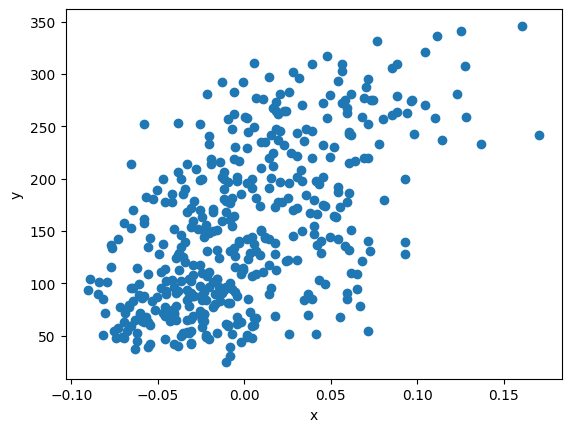

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:, 2], diabetes.target) #x축에는 입력값 전부 중 3번째 속성 값. y축에는 결과값 전부
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
x = diabetes.data[:, 2]
y = diabetes.target

In [ ]:
#경사하강법
#아주 중요!
#y = wx + b 훈련 데이터에 잘 맞는 w와 b를 찾는 방법

#무작위로 w와 b를 정한다
#x에서 샘플 하나를 선택해 예측 결과값을 계산
#예측 결과값과 실제 결과값을 비교 (틀릴 확률이 큼)
#w, b를 수정
#이를 반복한다

In [ ]:
w = 1.0
b = 1.0

y_hat=x[0]*w + b #전체 데이터 의 3번째 속성 중 1번째 값
print(y_hat)
print(y[0])
#차이가 크다

1.0616962065186832
151.0


In [ ]:
w_inc = w+0.1
y_hat_inc = x[0]*w_inc + b
print(y_hat_inc)
print(y[0])
#아주 조금 늘어남

1.0678658271705517
151.0


In [ ]:
#얼만큼 늘어났나?
w_rate = (y_hat_inc - y_hat) / (w_inc - w) #w_rate = x[0] w가 증가할 수록 y도 증가
print(w_rate)

0.06169620651868429


In [ ]:
#y < y_hat이라면? w가 감소해야 하는가? (왜냐면 x가 양수니까.)
#x가 음수인 경우는 w를 어떻게 해야할까?

#w_rate = x[0]
#w_rate가 양수인 경우 w_rate가 증가해야 y_hat도 증가
#w_rate가 음수인 경우 w_rate가 감소해야 y_hat 증가

w_new = w + w_rate #w+0.1이 아니라 w+w_rate 으로 변화율 자체를 더해버리면,
#w_new = w + w_rate = w + x[0] 즉 x[0] 이 양수냐 음수냐에 따라서 가중치의 값이 변화
print(w_new)

#변화율을 더하는 이유? 빠르게 수렴하고 일관되게 변화


1.0616962065186843


In [ ]:
b_inc = b + 0.1
y_hat_inc = x[0]*w + b_inc
print(y_hat_inc)
print(y[0])

1.1616962065186833
151.0


In [ ]:
b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate)

1.0


In [ ]:
b_new = b + 1
print(b_new)

#y_hat < y 인 경우라고 가정했을 때의 설정!

2.0


In [ ]:
#다만 y_hat과 y의 차이가 클 경우 빠르게 큰 폭으로 수정이 불가능하고,
#y_hat>y가 되어버리면 다시 y_hat을 감소시키지 못함

# -> 오차 역전파로 가중치와 절편 업데이트

err = y[0] - y_hat
w_new = w + (w_rate * err)
b_new = b + (1 * err)
print(w_new, b_new)
print(x[0]*w_new + b_new)

10.250624555903848 150.9383037934813
151.57072844302783


In [ ]:
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1]

w_new = w_new + w_rate*err
b_new = b_new + 1*err
print(w_new, b_new)

14.132317616380695 75.52764127612656


In [ ]:
#zip 함수
#x와 y를 하나씩 꺼내서 튜플로 만들어줌

for x_i, y_i in zip(x, y):
  y_hat = x_i * w + b
  err = y_i - y_hat
  w_rate = x_i
  w = w + (w_rate * err)
  b = b + 1 * err
print(w, b)

587.8654539985616 99.4093556453094


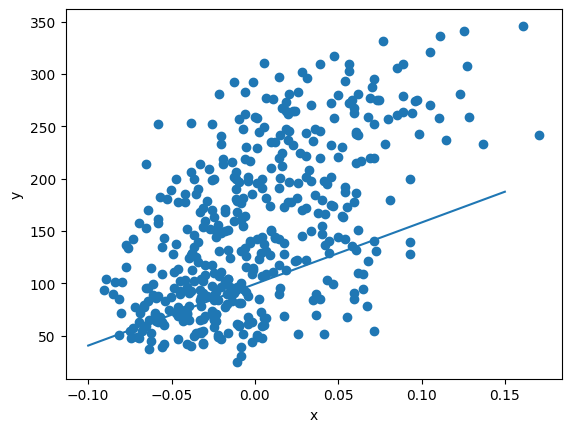

In [ ]:
plt.scatter(x, y)
# ()로 구성되면 튜플 구조임
# 튜플은 리스트와 다르게 정의되면 값을 바꿀 수 없다 따라서 성능도 빠름
# 이 코드는 pt1[0] = -0.1, pt1[1] = -0.1*w+b로 해석할 수 있지만,
# x가 -0.1 일때의 y값 -0.1*w+b를 저장했다고 볼 수 있음
# 따라서 plt.plot(pt1[0], pt1[1]) 으로 평면에 해당하는 점을 찍을 수 있다!
# plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
# 이 경우는 동일한 w, b이므로 직선이 그려짐

pt1 = (-0.1, -0.1*w+b)
pt2 = (0.15, 0.15*w+b)

plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')

plt.show()


In [ ]:
for i in range(1, 100):
  for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + (w_rate * err)
    b = b + 1 * err

print(w, b)

913.5973364346786 123.39414383177173


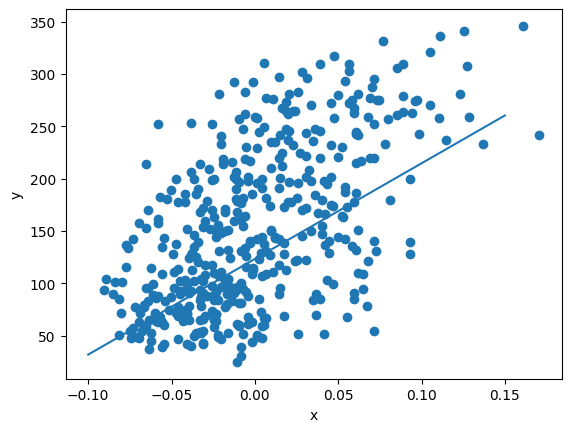

In [ ]:
plt.scatter(x, y)

pt1 = (-0.1, -0.1*w+b)
pt2 = (0.15, 0.15*w+b)

plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [ ]:
for i in range(1, 5000):
  for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + (w_rate * err)
    b = b + 1 * err

print(w, b)

913.5973364346786 123.39414383177173


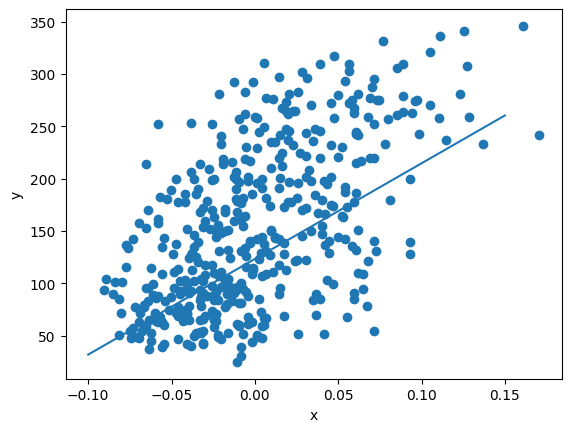

In [ ]:
plt.scatter(x, y)

pt1 = (-0.1, -0.1*w+b)
pt2 = (0.15, 0.15*w+b)

plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')

plt.show()


#큰 차이가 없다
#왜?
#1. 결국 특정 값에 수렴하게 된다.
#2. 오차 함수가 너무 간단함
#3. 경사하강법의 특성 상 특정 값에 도달하게 되면 업데이트가 없거나 미세함

287.8416643900139


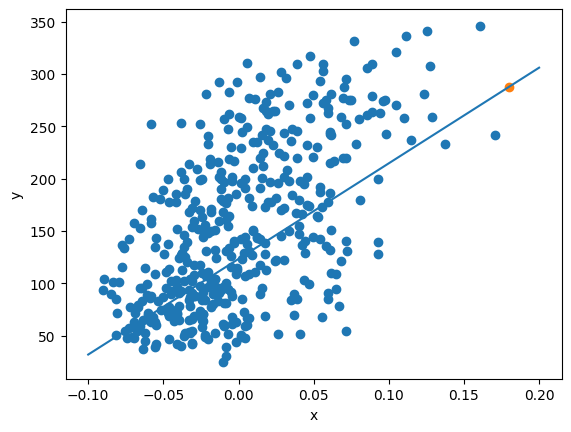

In [ ]:
x_new = 0.18
y_pred = x_new * w + b
print(y_pred)

plt.scatter(x, y)
plt.scatter(x_new, y_pred)
pt1 = (-0.1, -0.1*w+b)
pt2 = (0.2, 0.2*w+b)

plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
#손실 함수: 예측값과 실제 타깃값의 차이
#회귀, 분류에 널리 사용하는 손실 함수가 있음
#손실 함수의 차이를 줄이는 방법으로 경사 하강법을 사용

#제곱 오차
#SE = (y - y_hat)^2
#경사하강법은 손실함수의 기울기가 작은쪽으로 이동
#SE=0이 되는 지점이 최적의 솔루션
#SE' = -(y-y_hat)x 그레이디언트

#손실 함수의 미분 결과를 가중치에서 뺀다 = 손실 함수의 낮은 쪽으로 이동
#w - -(y-y_hat)x = w+(y-y_hat)x = w + w_rate*err
#아주 흥미롭다


In [ ]:
#선형 회귀를 위한 뉴런을 만들자
#나중에도 계속 사용할 거임~

#파이썬에서 클래스 이름은 대문자

class Neuron:
  def __init__(self):
    #파이썬의 특별한 메서드
    #클래스(객체) 처음 시작하면 실행되는 초기화 메서드

    #초기화 작업
    #궁금한 점: 미리 변수 선언을 안해도 되는가?
    self.w=1.0
    self.b=1.0

  #필요한 메서드
  #오차 계산을 위해 정방향 계산 만들기
  #예측값 계산
  def forpass(self, x):
    y_hat = self.w*x + self.b
    return y_hat

  #역방향계산(역전파)
  def backprop(self, x, err):
    w_grad = x *err
    b_grad = 1 *err
    return w_grad, b_grad


  def fit(self, x, y, epochs=100):
    for i in range(epochs):
      for x_i, y_i in zip(x, y):
        y_hat = self.forpass(x_i)
        err = -(y_i - y_hat)
        w_grad, b_grad = self.backprop(x_i, err)
        self.w -=w_grad
        self.b -=b_grad

In [ ]:
neuron = Neuron()
neuron.fit(x, y)

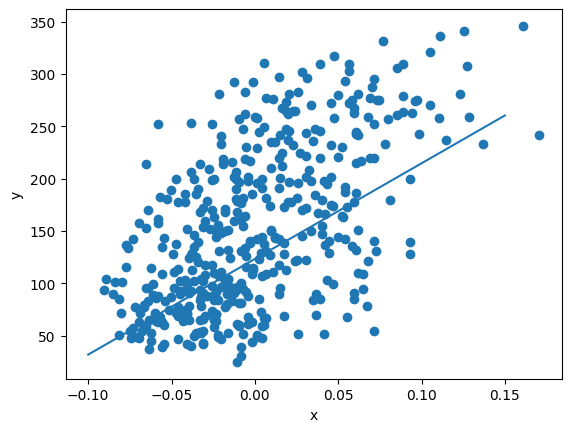

In [ ]:
plt.scatter(x, y)

pt1 = (-0.1, -0.1*neuron.w+neuron.b)
pt2 = (0.15, 0.15*neuron.w+neuron.b)

plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')

plt.show()